## 1. Detect text using PaddleOCR

### 1.1 Load PaddleOCR

In [1]:
!pip install -U scikit-image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 33.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.19.3
    Uninstalling scikit-image-0.19.3:
      Successfully uninstalled scikit-image-0.19.3


In [2]:
!python3 -m pip install paddlepaddle-gpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 749.8/749.8 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.4 MB/s eta 0:00:00


In [3]:
!pip install paddleocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.7/465.7 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 kB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 kB 16.7 MB/s e

In [4]:
from paddleocr import PaddleOCR, draw_ocr


ocr = PaddleOCR(use_angle_cls=True, lang='en')

download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 4.00M/4.00M [00:10<00:00, 375kiB/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer/en_PP-OCRv4_rec_infer.tar


100%|██████████| 10.2M/10.2M [00:11<00:00, 905kiB/s] 


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:07<00:00, 302kiB/s]

[2024/03/04 00:55:05] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='/

### 2. Read image and detect text

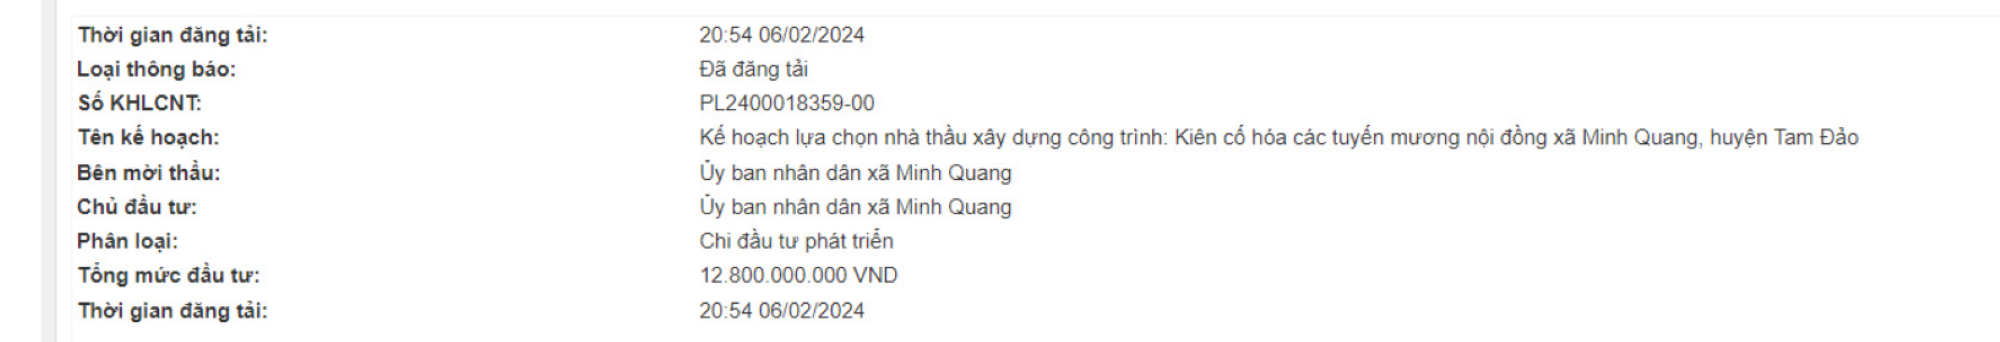

In [5]:
# hiển thị ảnh đầu vào

from google.colab.patches import cv2_imshow
import cv2


img_path = '/content/img.png'
img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [6]:
# lấy ra bboxes và text

results = ocr.ocr(img, cls=True)
# print(type(results))
for line in results:
  for x in line:
    print(x)

[2024/03/04 00:55:11] ppocr DEBUG: dt_boxes num : 18, elapsed : 1.8657588958740234
[2024/03/04 00:55:11] ppocr DEBUG: cls num  : 18, elapsed : 0.11975717544555664
[2024/03/04 00:55:11] ppocr DEBUG: rec_res num  : 18, elapsed : 0.2957596778869629
[[[75.0, 21.0], [271.0, 21.0], [271.0, 49.0], [75.0, 49.0]], ('Thoi gian dang tai:', 0.994541585445404)]
[[[696.0, 21.0], [869.0, 21.0], [869.0, 49.0], [696.0, 49.0]], ('20:54 06/02/2024', 0.9991800785064697)]
[[[73.0, 56.0], [238.0, 56.0], [238.0, 83.0], [73.0, 83.0]], ('Loai thong bao:', 0.9996322989463806)]
[[[696.0, 53.0], [812.0, 53.0], [812.0, 83.0], [696.0, 83.0]], ('Da dang tai', 0.9890666604042053)]
[[[74.0, 83.0], [207.0, 88.0], [206.0, 118.0], [73.0, 113.0]], ('S6 KHLCNT:', 0.9378498792648315)]
[[[694.0, 85.0], [875.0, 88.0], [875.0, 118.0], [694.0, 115.0]], ('PL2400018359-00', 0.9997319579124451)]
[[[75.0, 126.0], [221.0, 126.0], [221.0, 150.0], [75.0, 150.0]], ('Ten ke hoach:', 0.9949291944503784)]
[[[698.0, 124.0], [1860.0, 124.0]

In [7]:
from PIL import Image, ImageDraw, ImageFont
img = Image.open(img_path).convert("RGB")
# results : [[[[], [], []], (,)], ]
boxes = [info[0] for info in line for line in results]
texts = [info[1][0] for info in line for line in results]
scores = [info[1][1] for info in line for line in results]
print(boxes)
print(texts)
print(scores)

font = ImageFont.load_default()
img_show = draw_ocr(img, boxes, texts, scores, font_path='/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf' )
img_show = Image.fromarray(img_show)
img_show.save('result.jpg')


[[[75.0, 21.0], [271.0, 21.0], [271.0, 49.0], [75.0, 49.0]], [[696.0, 21.0], [869.0, 21.0], [869.0, 49.0], [696.0, 49.0]], [[73.0, 56.0], [238.0, 56.0], [238.0, 83.0], [73.0, 83.0]], [[696.0, 53.0], [812.0, 53.0], [812.0, 83.0], [696.0, 83.0]], [[74.0, 83.0], [207.0, 88.0], [206.0, 118.0], [73.0, 113.0]], [[694.0, 85.0], [875.0, 88.0], [875.0, 118.0], [694.0, 115.0]], [[75.0, 126.0], [221.0, 126.0], [221.0, 150.0], [75.0, 150.0]], [[698.0, 124.0], [1860.0, 124.0], [1860.0, 152.0], [698.0, 152.0]], [[77.0, 160.0], [221.0, 160.0], [221.0, 184.0], [77.0, 184.0]], [[696.0, 156.0], [1015.0, 160.0], [1014.0, 188.0], [696.0, 184.0]], [[74.0, 188.0], [200.0, 193.0], [199.0, 223.0], [73.0, 218.0]], [[696.0, 190.0], [1015.0, 195.0], [1014.0, 222.0], [696.0, 218.0]], [[73.0, 227.0], [181.0, 227.0], [181.0, 256.0], [73.0, 256.0]], [[696.0, 227.0], [894.0, 227.0], [894.0, 254.0], [696.0, 254.0]], [[73.0, 259.0], [265.0, 261.0], [264.0, 291.0], [73.0, 288.0]], [[698.0, 261.0], [900.0, 261.0], [900.0

In [8]:
ans = {}
for i in range(0, len(texts), 2):
  ans[texts[i]] = texts[i+1]
  # print(ans[texts[i]])


for key, value in ans.items():
  print(key, value)


Thoi gian dang tai: 20:54 06/02/2024
Loai thong bao: Da dang tai
S6 KHLCNT: PL2400018359-00
Ten ke hoach: Ke hoach lya chon nha thau xay dung cong trinh: Kien co hoa cac tuyen muong noi dong xa Minh Quang, huyen Tam Dao
Ben moi thau: Uy ban nhan dan xa Minh Quang
Chu dau tur: Uy ban nhan dan xa Minh Quang
Phan loai: Chi dau tu phat trien
Tong muc dau tur: 12.800.000.000 VND


In [9]:
# lưu các thông số sau khi detect và ảnh kết quả

from PIL import Image, ImageDraw, ImageFont
img = Image.open(img_path).convert("RGB")
# results : [[[[], [], []], (,)], ]
boxes = [info[0] for info in line for line in results]
texts = [info[1][0] for info in line for line in results]
scores = [info[1][1] for info in line for line in results]
print(boxes)
print(texts)
print(scores)

font = ImageFont.load_default()
img_show = draw_ocr(img, boxes, texts, scores, font_path='/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf')
img_show = Image.fromarray(img_show)
img_show.save('result.jpg')


[[[75.0, 21.0], [271.0, 21.0], [271.0, 49.0], [75.0, 49.0]], [[696.0, 21.0], [869.0, 21.0], [869.0, 49.0], [696.0, 49.0]], [[73.0, 56.0], [238.0, 56.0], [238.0, 83.0], [73.0, 83.0]], [[696.0, 53.0], [812.0, 53.0], [812.0, 83.0], [696.0, 83.0]], [[74.0, 83.0], [207.0, 88.0], [206.0, 118.0], [73.0, 113.0]], [[694.0, 85.0], [875.0, 88.0], [875.0, 118.0], [694.0, 115.0]], [[75.0, 126.0], [221.0, 126.0], [221.0, 150.0], [75.0, 150.0]], [[698.0, 124.0], [1860.0, 124.0], [1860.0, 152.0], [698.0, 152.0]], [[77.0, 160.0], [221.0, 160.0], [221.0, 184.0], [77.0, 184.0]], [[696.0, 156.0], [1015.0, 160.0], [1014.0, 188.0], [696.0, 184.0]], [[74.0, 188.0], [200.0, 193.0], [199.0, 223.0], [73.0, 218.0]], [[696.0, 190.0], [1015.0, 195.0], [1014.0, 222.0], [696.0, 218.0]], [[73.0, 227.0], [181.0, 227.0], [181.0, 256.0], [73.0, 256.0]], [[696.0, 227.0], [894.0, 227.0], [894.0, 254.0], [696.0, 254.0]], [[73.0, 259.0], [265.0, 261.0], [264.0, 291.0], [73.0, 288.0]], [[698.0, 261.0], [900.0, 261.0], [900.0

### 1.2 Split boundingbox and save images

In [10]:
import cv2
import os
from PIL import Image

save_dir = "./Image"
img_path = '/content/img.png'


def split_bounding_box(boxes, img_path, save_dir):

    os.makedirs(save_dir, exist_ok=True)

    count = 0
    img = Image.open(img_path)
    for box in boxes:
        cropped_img = img.crop((box[0][0], box[0][1], box[2][0], box[2][1])).convert("RGB") # điểm trái trên và phải dưới
        print(cropped_img)
        file_name = f"{count:06d}.jpg"

        cropped_img.save(os.path.join(save_dir, file_name))
        count += 1

split_bounding_box(boxes, img_path, save_dir)


<PIL.Image.Image image mode=RGB size=196x28 at 0x79C1FD213A90>
<PIL.Image.Image image mode=RGB size=173x28 at 0x79C1FD2124D0>
<PIL.Image.Image image mode=RGB size=165x27 at 0x79C1FD213A90>
<PIL.Image.Image image mode=RGB size=116x30 at 0x79C1FD2124D0>
<PIL.Image.Image image mode=RGB size=132x35 at 0x79C1FD213A90>
<PIL.Image.Image image mode=RGB size=181x33 at 0x79C1FD2124D0>
<PIL.Image.Image image mode=RGB size=146x24 at 0x79C1FD213A90>
<PIL.Image.Image image mode=RGB size=1162x28 at 0x79C1FD2124D0>
<PIL.Image.Image image mode=RGB size=144x24 at 0x79C1FD213A90>
<PIL.Image.Image image mode=RGB size=318x32 at 0x79C1FD2124D0>
<PIL.Image.Image image mode=RGB size=125x35 at 0x79C1FD213A90>
<PIL.Image.Image image mode=RGB size=318x32 at 0x79C1FD2124D0>
<PIL.Image.Image image mode=RGB size=108x29 at 0x79C1FD213A90>
<PIL.Image.Image image mode=RGB size=198x27 at 0x79C1FD2124D0>
<PIL.Image.Image image mode=RGB size=191x32 at 0x79C1FD213A90>
<PIL.Image.Image image mode=RGB size=202x28 at 0x79C1F

## 2.Extract Vietnamese text using VietOCR

### 2.1 Load VietOCR

In [11]:
! pip install --quiet vietocr

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done


In [12]:
import matplotlib.pyplot as plt
from PIL import Image

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg
from vietocr.model.trainer import Trainer


In [15]:
config = Cfg.load_config_from_name("vgg_seq2seq")
config['weights'] = "/content/drive/MyDrive/transformerocr.pth"
config['cnn']['pretrained']= False
config['device'] = 'cuda:0'
config['predictor']['beamsearch']= False

detector = Predictor(config)

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 2.1 Get Text

Ủy ban nhân dân xã Minh Quang


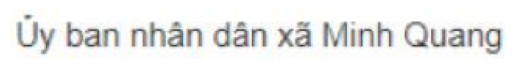

In [16]:
img_path = "/content/Image/000009.jpg"

img = Image.open(img_path)
plt.imshow(img)
plt.axis('off')
text = detector.predict(img)
print(text)

In [17]:
folder_img = "/content/Image"

result_texts = []
for img_path in sorted(os.listdir(folder_img)):
    img = Image.open(os.path.join(folder_img, img_path))
    text = detector.predict(img)
    result_texts.append(text)
    print(text)


Thời gian đăng tải:
20:54 06/02/2024
Loại thông báo:
Đã đăng tải
SỐ KHLCNT:
PL2400018359-00
Tên kể hoạch:
Kể hoạch lựa chọn nhà thầu xây dựng công trình: Kiên cổ hóa các tuyến mương nội đồng xã Minh Quang, huyện Tam Đảo
Bên mời thầu:
Ủy ban nhân dân xã Minh Quang
Chủ đầu tư:
Ủy ban nhân dân xã Minh Quang
Phân loại:
Chi đầu tư phát triển
Tổng mức đầu tư:
12.800.000.000 VND
Thời gian đăng tải:
20:54 06/02/2024


### 2.3 save as dictionary

Thời gian đăng tải: 20:54 06/02/2024
Loại thông báo: Đã đăng tải
SỐ KHLCNT: PL2400018359-00
Tên kể hoạch: Kể hoạch lựa chọn nhà thầu xây dựng công trình: Kiên cổ hóa các tuyến mương nội đồng xã Minh Quang, huyện Tam Đảo
Bên mời thầu: Ủy ban nhân dân xã Minh Quang
Chủ đầu tư: Ủy ban nhân dân xã Minh Quang
Phân loại: Chi đầu tư phát triển
Tổng mức đầu tư: 12.800.000.000 VND



(-0.5, 1999.5, 341.5, -0.5)

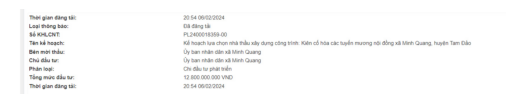

In [18]:

ans = {result_texts[i]: result_texts[i+1] for i in range(0, len(result_texts), 2)}
for key, value in ans.items():
    print(key, value)


print()
img_path = '/content/img.png'
img_raw = Image.open(img_path).convert("RGB")
plt.imshow(img_raw)
plt.axis("off")

### 2.4 Retrain the model


#### 2.4.1 Load dataset

In [19]:
# dataset root
# ! wget https://vocr.vn/data/vietocr/data_line.zip
# ! unzip -qq -o ./data_line.zip

In [20]:
!unzip -qq -o /content/drive/MyDrive/data_line_end.zip

#### 2.4.2 Config parameters

In [21]:
config = Cfg.load_config_from_name("vgg_seq2seq")

In [22]:
dataset_params = {
    'name': 'hw',
    'data_root': './data_line/',
    'train_annotation': 'train_line_annotation.txt',
    'valid_annotation':'test_line_annotation.txt',
}

params = {
    'print_every': 300,
    'valid_every': 3*300,
    'iters':10000,
    'checkpoint':'./checkpoint/transformerocr_checkpoint.pth',
    'export': './weights/transformerocr.pth',
    'metrics': 10000
}


config["weight"] = "/content/drive/MyDrive/File/transformerocr.pth"
config['trainer'].update(params)
config['dataset'].update(dataset_params)
config['device'] = 'cuda:0'


In [23]:
config

{'vocab': 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ ',
 'device': 'cuda:0',
 'seq_modeling': 'seq2seq',
 'transformer': {'encoder_hidden': 256,
  'decoder_hidden': 256,
  'img_channel': 256,
  'decoder_embedded': 256,
  'dropout': 0.1},
 'optimizer': {'max_lr': 0.001, 'pct_start': 0.1},
 'trainer': {'batch_size': 32,
  'print_every': 300,
  'valid_every': 900,
  'iters': 10000,
  'export': './weights/transformerocr.pth',
  'checkpoint': './checkpoint/transformerocr_checkpoint.pth',
  'log': './train.log',
  'metrics': 10000},
 'dataset': {'name': 'hw',
  'data_root': './data_line/',
  'train_annotation': 'train_line_annotation.txt',
  'valid_annotation': 'test_line_annotation.txt',
  'image_height': 32,
  'image_min_width': 32,
  'image_max_width': 512},
 'dataloader': {'num_workers': 3, 'pin_memory

In [24]:
trainer = Trainer(config, pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth
100%|██████████| 548M/548M [00:08<00:00, 64.3MB/s]
10935it [00:09, 1168.39it/s]
Create train_hw: 100%|████████████████████████████████████████| 5696/5696 [00:04<00:00, 1407.24it/s]

Created dataset with 5695 samples



Create valid_hw: 100%|████████████████████████████████████████| 1813/1813 [00:01<00:00, 1269.77it/s]


Created dataset with 1812 samples


valid_hw build cluster: 100%|████████████████████████████████| 1812/1812 [00:00<00:00, 74425.94it/s]


In [25]:
# tránh gặp lỗi khi phiên bản numpy của model đã cũ

import numpy as np
np.bool = np.bool_

#### 2.4.3 Training

In [ ]:
trainer.train()

iter: 000300 - train loss: 1.334 - lr: 2.38e-04 - load time: 1.70 - gpu time: 196.51
iter: 000600 - train loss: 1.077 - lr: 6.69e-04 - load time: 2.85 - gpu time: 188.59
iter: 000900 - train loss: 0.995 - lr: 9.77e-04 - load time: 2.46 - gpu time: 192.07
iter: 000900 - valid loss: 0.984 - acc full seq: 0.0099 - acc per char: 0.4654
iter: 001200 - train loss: 0.933 - lr: 9.99e-04 - load time: 1.44 - gpu time: 189.87
iter: 001500 - train loss: 0.893 - lr: 9.92e-04 - load time: 3.11 - gpu time: 187.09
iter: 001800 - train loss: 0.868 - lr: 9.81e-04 - load time: 2.62 - gpu time: 188.12
iter: 001800 - valid loss: 0.925 - acc full seq: 0.0220 - acc per char: 0.5257
iter: 002100 - train loss: 0.843 - lr: 9.64e-04 - load time: 2.52 - gpu time: 188.61
iter: 002400 - train loss: 0.819 - lr: 9.41e-04 - load time: 1.75 - gpu time: 185.87
iter: 002700 - train loss: 0.803 - lr: 9.14e-04 - load time: 2.52 - gpu time: 187.76
iter: 002700 - valid loss: 0.905 - acc full seq: 0.0334 - acc per char: 0.559

In [ ]:
trainer.config.save("config.yml")

#### 2.4.4 Predict after training

In [ ]:
# config = Cfg.load_config_from_name("vgg_transformer")
# config['weights'] = "/content/drive/MyDrive/File/transformerocr.pth"
# config['cnn']['pretrained']=True
# config['device'] = 'cuda:0'
# config['predictor']['beamsearch']=False

detector = Predictor(config)

In [ ]:
img_path = "/content/Image/000010.jpg"

img = Image.open(img_path)
plt.imshow(img)
plt.axis('off')
text = detector.predict(img)
print(text)

In [ ]:
folder_image = "/content/Image"

results = []
for img_path in sorted(os.listdir(folder_img)):
    img = Image.open(os.path.join(folder_img, img_path))
    text = detector.predict(img)
    results.append(text)
    print(text)

In [ ]:

anwser = {results[i]: results[i+1] for i in range(0, len(results), 2)}
for key, value in anwser.items():
    print(key, value)


print()
img_path = '/content/img.png'
img_raw = Image.open(img_path).convert("RGB")
plt.imshow(img_raw)
plt.axis("off")